Checking matches for spec2vec score > 0.00
Checking matches for spec2vec score > 0.05
Checking matches for spec2vec score > 0.10
Checking matches for spec2vec score > 0.15
Checking matches for spec2vec score > 0.20
Checking matches for spec2vec score > 0.25
Checking matches for spec2vec score > 0.30
Checking matches for spec2vec score > 0.35
Checking matches for spec2vec score > 0.40
Checking matches for spec2vec score > 0.45
Checking matches for spec2vec score > 0.50
Checking matches for spec2vec score > 0.55
Checking matches for spec2vec score > 0.60
Checking matches for spec2vec score > 0.65
Checking matches for spec2vec score > 0.70
Checking matches for spec2vec score > 0.75
Checking matches for spec2vec score > 0.80
Checking matches for spec2vec score > 0.85
Checking matches for spec2vec score > 0.90
Checking matches for spec2vec score > 0.95
Checking matches for spec2vec score > 0.98
Checking matches for spec2vec score > 0.99
Checking matches for spec2vec score > 1.00
Checking ma

Checking matches for spec2vec score > 0.00
Checking matches for spec2vec score > 0.05
Checking matches for spec2vec score > 0.10
Checking matches for spec2vec score > 0.15
Checking matches for spec2vec score > 0.20
Checking matches for spec2vec score > 0.25
Checking matches for spec2vec score > 0.30
Checking matches for spec2vec score > 0.35
Checking matches for spec2vec score > 0.40
Checking matches for spec2vec score > 0.45
Checking matches for spec2vec score > 0.50
Checking matches for spec2vec score > 0.55
Checking matches for spec2vec score > 0.60
Checking matches for spec2vec score > 0.65
Checking matches for spec2vec score > 0.70
Checking matches for spec2vec score > 0.75
Checking matches for spec2vec score > 0.80
Checking matches for spec2vec score > 0.85
Checking matches for spec2vec score > 0.90
Checking matches for spec2vec score > 0.95
Checking matches for spec2vec score > 0.98
Checking matches for spec2vec score > 0.99
Checking matches for spec2vec score > 1.00
Checking ma

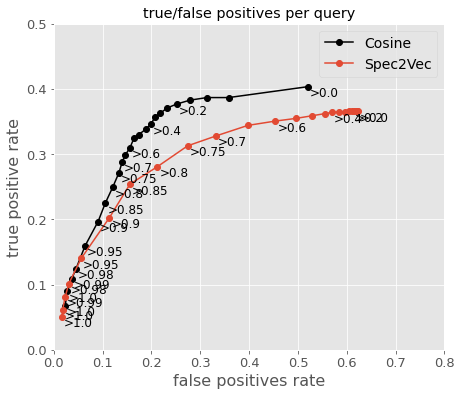

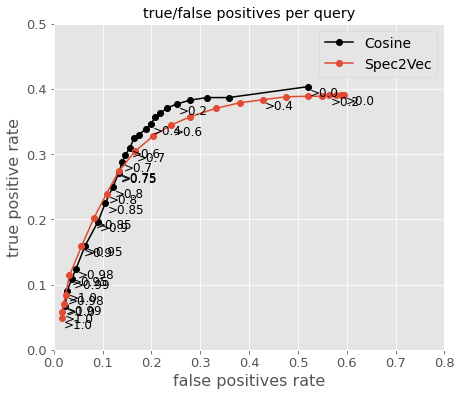

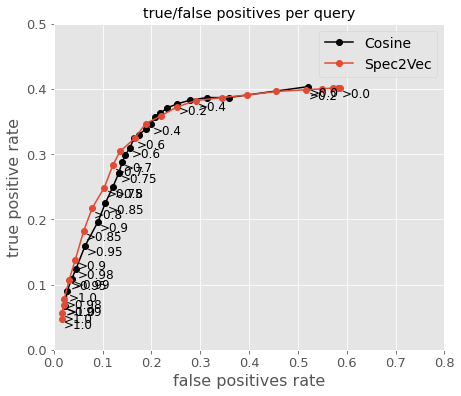

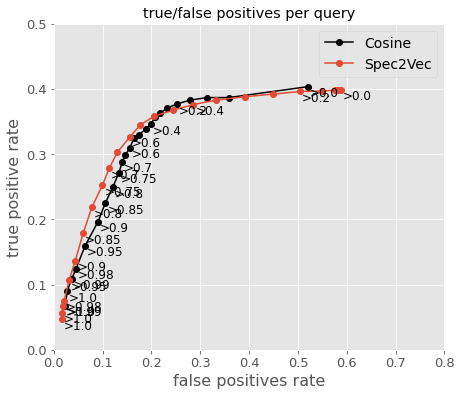

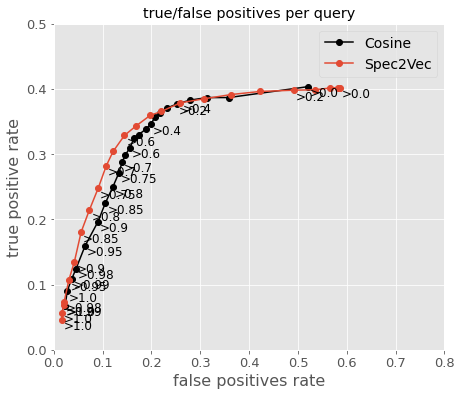

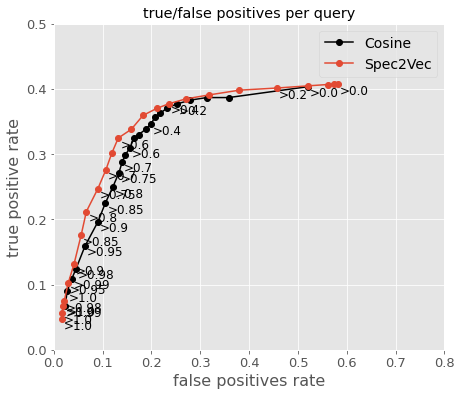

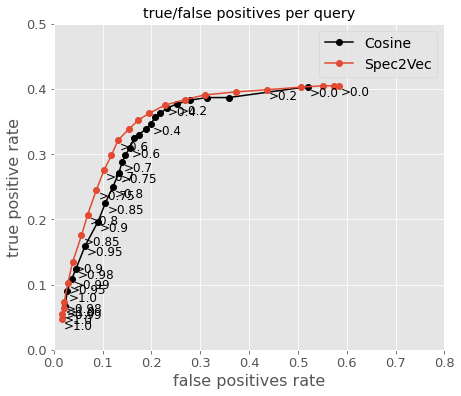

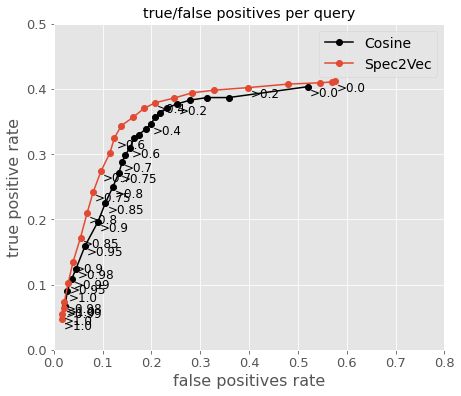

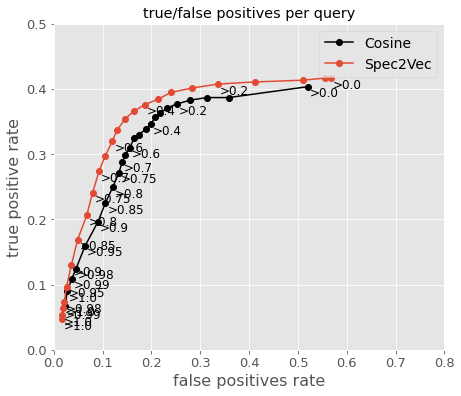

In [1]:
import dimension_optim
dimension_optim.init(query_size=1500, library_size=3500, unseen_query_size=0, unique_match=False)

dims = [170] # number of dimensions the Spec2Vec model is trained on
intensities = [0.5] # intensity_weighting_power for embedding spectra
miss_percentages = [15] # the maximum (weighted) fraction of the spectrum that is allowed to be missing for embedding spectra
fails = [] # I think that usually it fails because the matrix might not be positive semi-definitie, maybe it has to do with D  
diags = [0.0000002, 0.0000005, 0.00000075, 0.000001, 0.0000015, 0.000002, 0.000003, ]
model_file = os.path.join('C:\\Users\\Gosia\\Desktop\\trained_models_1\\spec2vec_size_170.model')


for dim in dims:
    for i in intensities:
        for p in miss_percentages:
            kwargs = dict(size=dim,intensity_weighting_power=i,allowed_missing_percentage=p, model_file)
            try:
                dimension_optim.f(**kwargs)
            except AssertionError:
                fails.append(kwargs)
                pass

In [2]:
print(fails)

[]


In [3]:
singletons = set([i for i, v in dimension_optim.inchi_dict.items() if len(v) == 1])
multis = set([i for i, v in dimension_optim.inchi_dict.items() if len(v) > 1])
print(len(singletons),len(multis))

2668 1890


In [6]:
import os
import gensim
folder_name = 'C:\\Users\\Gosia\\Desktop'
path_models = os.path.join(folder_name, "trained_models")
model_file = os.path.join(path_models, "spec2vec_AllPositive_ratio05_filtered_201101_iter_15.model")
model = gensim.models.Word2Vec.load(model_file)


In [10]:
help(model)

Help on Word2Vec in module gensim.models.word2vec object:

class Word2Vec(gensim.models.base_any2vec.BaseWordEmbeddingsModel)
 |  Word2Vec(sentences=None, corpus_file=None, size=100, alpha=0.025, window=5, min_count=5, max_vocab_size=None, sample=0.001, seed=1, workers=3, min_alpha=0.0001, sg=0, hs=0, negative=5, ns_exponent=0.75, cbow_mean=1, hashfxn=<built-in function hash>, iter=5, null_word=0, trim_rule=None, sorted_vocab=1, batch_words=10000, compute_loss=False, callbacks=(), max_final_vocab=None)
 |  
 |  Train, use and evaluate neural networks described in https://code.google.com/p/word2vec/.
 |  
 |  Once you're finished training a model (=no more updates, only querying)
 |  store and use only the :class:`~gensim.models.keyedvectors.KeyedVectors` instance in `self.wv` to reduce memory.
 |  
 |  The model can be stored/loaded via its :meth:`~gensim.models.word2vec.Word2Vec.save` and
 |  :meth:`~gensim.models.word2vec.Word2Vec.load` methods.
 |  
 |  The trained word vectors can 

In [17]:
model.wv.vector_size
len(model.wv.vocab)

115910

In [21]:
import os
import gensim
folder_name = 'C:\\Users\\Gosia\\Desktop'
path_models = os.path.join(folder_name, "trained_models")
model_file = os.path.join(path_models, "spec2vec_librarymatching_size_300.model")
model = gensim.models.Word2Vec.load(model_file)

In [22]:
print(model.wv.vector_size)
len(model.wv.vocab)

300


37656

In [23]:
import os
import sys
import gensim
import numpy as np

ROOT = os.path.dirname(os.getcwd())
#path_data = os.path.join(ROOT, 'data')
path_data = 'C:\\Users\\Gosia\\Desktop\\'
sys.path.insert(0, ROOT)

In [24]:
import passatuto_parser as pp
sys.path.append('C:\\Users\\Gosia\\Desktop\\FDR-Metabolomics\\src\\passatuto_parser.py')


pre_spectrums_query = pp.PassatutoParser(r'C:\\Users\\Gosia\\Desktop\\MassbankOrbi').parse_folder()
pre_spectrums_lib = pp.PassatutoParser('C:\\Users\\Gosia\\Desktop\\Gnps_Noise_Filtered').parse_folder()

pre_spectrums_query = pre_spectrums_query[:5]
pre_spectrums_lib = pre_spectrums_lib[:5]

# Using MatchMS to create spectra for both
from matchms.importing.load_from_json import as_spectrum
spectrums_query = []
for i, s in enumerate( pre_spectrums_query ):
    spectrums_query.append(as_spectrum(s))
    if i and i % 100 == 0:
        print('processed %d' % i)
        
spectrums_lib = []
for i, s in enumerate( pre_spectrums_lib ):
    spectrums_lib.append(as_spectrum(s))
    if i and i % 100 == 0:
        print('processed %d' % i)
        

processed 100 files
processed 200 files
processed 300 files
processed 400 files
Finished parsing of 457 spectra 
processed 100 files
processed 200 files
processed 300 files
processed 400 files
processed 500 files
processed 600 files
processed 700 files
processed 800 files
processed 900 files
processed 1000 files
processed 1100 files
processed 1200 files
processed 1300 files
processed 1400 files
processed 1500 files
processed 1600 files
processed 1700 files
processed 1800 files
processed 1900 files
processed 2000 files
processed 2100 files
processed 2200 files
processed 2300 files
processed 2400 files
processed 2500 files
processed 2600 files
processed 2700 files
processed 2800 files
processed 2900 files
processed 3000 files
processed 3100 files
processed 3200 files
processed 3300 files
processed 3400 files
processed 3500 files
processed 3600 files
processed 3700 files
processed 3800 files
processed 3900 files
processed 4000 files
Finished parsing of 4095 spectra 


In [25]:
from matchms.filtering import normalize_intensities
# Spec2Vec trained model requires normalizing
spectrums_query = [normalize_intensities(s) for s in spectrums_query]
spectrums_lib = [normalize_intensities(s) for s in spectrums_lib]

In [43]:
import os
import gensim
folder_name = 'C:\\Users\\Gosia\\Desktop'
path_models = os.path.join(path_data, "trained_models")
model_file = os.path.join(path_models, "spec2vec_size_10_iter_60.model")

# Load pretrained model
model = gensim.models.Word2Vec.load(model_file)

In [36]:
from spec2vec import Spec2Vec
from spec2vec import SpectrumDocument

documents_query = [SpectrumDocument(s, n_decimals=2) for s in spectrums_query]
documents_lib = [SpectrumDocument(s, n_decimals=2) for s in spectrums_lib]
print(documents_query)


[<spec2vec.SpectrumDocument.SpectrumDocument object at 0x000002B063C92490>, <spec2vec.SpectrumDocument.SpectrumDocument object at 0x000002B063C92340>, <spec2vec.SpectrumDocument.SpectrumDocument object at 0x000002B09C9E1DC0>, <spec2vec.SpectrumDocument.SpectrumDocument object at 0x000002B063C92430>, <spec2vec.SpectrumDocument.SpectrumDocument object at 0x000002B063C92310>]


In [37]:
from tqdm.notebook import tqdm  # optional, just to get a progress bar
from spec2vec.vector_operations import calc_vector


intensity_weighting_power = 0.5
allowed_missing_percentage = 70 # specify the maximum (weighted) fraction of the spectrum that is allowed to be missing

vector_size = model.vector_size
print(f"Embedding vector size: {vector_size}")

embeddings_spec2vec_query = np.zeros((len(documents_query), vector_size), dtype="float")
for i, doc in enumerate(tqdm(documents_query)):
    embeddings_spec2vec_query[i, 0:vector_size] = calc_vector(model, doc,
                                                        intensity_weighting_power,
                                                        allowed_missing_percentage)
embeddings_spec2vec_lib = np.zeros((len(documents_lib), vector_size), dtype="float")
for i, doc in enumerate(tqdm(documents_lib)):
    embeddings_spec2vec_lib[i, 0:vector_size] = calc_vector(model, doc,
                                                        intensity_weighting_power,
                                                        allowed_missing_percentage)

Embedding vector size: 10


In [29]:
embeddings_spec2vec_lib_30 = embeddings_spec2vec_lib
embeddings_spec2vec_query_30 = embeddings_spec2vec_query

In [33]:
embeddings_spec2vec_lib_60 = embeddings_spec2vec_lib
embeddings_spec2vec_query_60 = embeddings_spec2vec_query

In [38]:
embeddings_spec2vec_lib_80 = embeddings_spec2vec_lib
embeddings_spec2vec_query_80 = embeddings_spec2vec_query

In [45]:
embeddings_spec2vec_query_60 == embeddings_spec2vec_query_80

array([[False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False]])

In [42]:
len(model.wv.vocab)

98510

In [44]:
len(model.wv.vocab)

98510

In [46]:
print(embeddings_spec2vec_query_30[0])
print(embeddings_spec2vec_query_60[0])
print(embeddings_spec2vec_query_80[0])

[-75.4284969   28.20423281   4.53427714 -17.31561643  41.11186866
 -46.88895959  -9.30041045  12.83893483  15.57272382 -27.07478264]
[114.91147517 -59.12535788  31.78325295 -22.99938356 -71.57501112
  18.9687924   -2.95488005  32.9549765   59.18765696 -20.1991931 ]
[ -13.87829842  -84.32929343 -102.56290663 -112.4925032   -57.27392691
  -79.66248891    7.46283233 -141.7274595    89.62724041   18.94313107]
